In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set()
Candledf=pd.read_csv('../result.dat',low_memory=False)
Candledf['ndatetime']=pd.to_datetime(Candledf['ndatetime'],format='%Y-%m-%d %H:%M:%S.%f')
print(Candledf.tail())

                ndatetime   open   high    low  close  volume
10213 2021-11-16 10:33:30  17705  17717  17688  17707   12000
10214 2021-11-16 11:15:00  17707  17708  17658  17673   12000
10215 2021-11-16 11:44:49  17673  17695  17665  17672   12000
10216 2021-11-16 12:28:40  17672  17699  17671  17690   12000
10217 2021-11-16 13:24:47  17690  17701  17680  17701    9390


In [11]:
(Candledf.close.shift(-20) / Candledf.close > 1).astype(int).tail()

10213    0
10214    0
10215    0
10216    0
10217    0
Name: close, dtype: int32

In [12]:
def triple_barrier(price, ub, lb, max_period):
    
    def end_price(s):
        return np.append(s[(s / s[0] > ub) | (s / s[0] < lb)], s[-1])[0]/s[0]
    
    r = np.array(range(max_period))
    
    def end_time(s):
        return np.append(r[(s / s[0] > ub) | (s / s[0] < lb)], max_period-1)[0]

    p = price.rolling(max_period).apply(end_price, raw=True).shift(-max_period+1)
    t = price.rolling(max_period).apply(end_time, raw=True).shift(-max_period+1)
    t = pd.Series([t.index[int(k+i)] if not math.isnan(k+i) else np.datetime64('NaT') 
                   for i, k in enumerate(t)], index=t.index).dropna()

    signal = pd.Series(0, p.index)
    signal.loc[p > ub] = 1
    signal.loc[p < lb] = -1
    ret = pd.DataFrame({'triple_barrier_profit':p, 'triple_barrier_sell_time':t, 'triple_barrier_signal':signal})

    return ret

<AxesSubplot:>

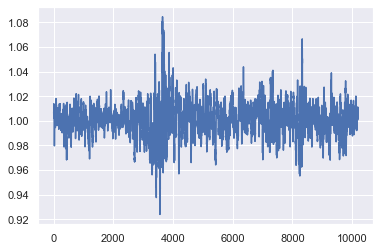

In [14]:
ret = triple_barrier(Candledf.close, 1.07, 0.97, 20)
ret.triple_barrier_profit.plot()